In [1]:
import getpass
import os

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated    
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]
    
graph_builder = StateGraph(State)

In [6]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")

def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [10]:
llm.invoke("Hello, how are you?").content

"I'm a large language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?"

In [7]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [8]:
graph = graph_builder.compile()

In [12]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'chatbot': Node(id='chatbot', name='chatbot', data=chatbot(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='chatbot', data=None, conditional=False), Edge(source='chatbot', target='__end__', data=None, conditional=False)])

In [20]:
print(graph.get_graph().draw_mermaid_png())

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00j\x00\x00\x00\xea\x08\x02\x00\x00\x00\xc5\xf3G\x18\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x16\xdeIDATx\x9c\xed\x9di`\x14E\xda\xc7k\xba\xe7>3\x99\x90c&\t\x99\\\x04\x92\x001`\xb2q\x97p\x04QN\x159\xc4\x97\x95\x85w\x05Y\x0e\x05\x17aQ\x16\xaf\xd5\x85E@\r\x88 \x04a\x05E1\x08\x08$"\xd9\xe5\\\x08\xd1\x84@ LNrg\x8ed\xee\xa3\x8f\xf7C\xfb\x86\xac\xce\x99\x9e!=\xb1\x7f\x9f&S\xd5=O\xff\xd3]U\xfd\xd4S\xf50p\x1c\x074}\x05\xeao\x03\x82\x1bZ>R\xd0\xf2\x91\x82\x96\x8f\x14\xb4|\xa4\xa0\xe5#\x05\x93\xe4\xf1\x06\xad\xa3[\xe30\x1bP\xb3\x1eE\x1c8\x86\x05\xc10\x88\xcd\x858<\x88/\x82\x05\x12f\x98\x9cC\xe6T\x8c\xbe\x8d\xfb4\xad\xb6\x9a\nS\xdd\r\x13\x9b\xcf\x008\x83/\x82\xf9b\x98\'`bh\x10\xc8\x07\xc1\xa0\xab\xd3a6\xa0\\>\xd4RkU\xa6\t\x12\xd2\x05\xd1\xc9\xfc>\x9c\xcag\xf9\x8c]\xc8\xa5\xe3j\x1c\x80\x900\x962]\x10\x1e\xcd\xed\xc3\xafR\x07\x83\xceQWi\xeah\xb2u\xb5;~3M\xa6H\xe0\xf9t\xb8o\xf2]+\xd2V^\xea\xce\x99\x166$S\xe4\xbb\xa9\x94\xa6\xb5\xder\xf9\xb8F\x1a\

In [ ]:
print(graph.get_graph().draw_ascii())

+-----------+  
| __start__ |  
+-----------+  
      *        
      *        
      *        
 +---------+   
 | chatbot |   
 +---------+   
      *        
      *        
      *        
 +---------+   
 | __end__ |   
 +---------+   


In [19]:
print(graph.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	chatbot(chatbot)
	__end__([<p>__end__</p>]):::last
	__start__ --> chatbot;
	chatbot --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



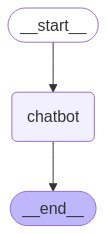

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [22]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        print("User: " + user_input)
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hi
Assistant: How can I assist you today?
User: how are you
Assistant: I'm functioning properly. What can I help you with?
Goodbye!
